<a href="https://colab.research.google.com/github/wongwara/AT2_Classification/blob/main/MLAA_Lab_4_Exercise_3_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 4: Binary Classification**



## Exercise 3: Binary classification on Titanic dataset

For this exercice we will once again build a binary classifier using a logistic regression and a KNN.

For that we will use the famous Titanic dataset which we can find from Kaggle:
https://www.kaggle.com/c/titanic/data


The steps are:
1.   Import and explore dataset
2.   Data preparation
3.   Data Splitting
4.   Assess model baseline
5.   Train a logistic regression model
6.   Train Logistic Regression Classifier with L1 and L2 Regularisation
7.   Build a KNN model using euclidean distance
8.   Build a KNN model using euclidean distance and 50 neighbors
9.   Assess the Best Model on the Testing Set

### 1. Import and Explore Dataset

**[1.2]** Import the pandas package

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import pandas as pd

**[1.2]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab4/ex3/Titanic.csv'
df = pd.read_csv(file_url)

In [ ]:
# Unit Tests
assert isinstance(file_url, str)
assert isinstance(df, pd.DataFrame)

**[1.3]** Display the first 5 rows of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.head()

,Unnamed: 0,passenger_id,survived,male,female,age,number_sibling_spouse,number_parent_children,fare,embarked_southampton,embarked_cherbourg,embarked_queenstown,ticket_class
0,0,1,0,1,0,22.0,1,0,7.2500,1,0,0,3.0
1,1,2,1,0,1,35.0,1,0,71.2833,0,1,0,1.0
2,2,3,1,0,1,26.0,0,0,7.9250,1,0,0,3.0
3,3,4,1,0,1,35.0,1,0,53.1000,1,0,0,1.0
4,4,5,0,1,0,35.0,0,0,8.0500,1,0,0,3.0


**[1.4]** Display the dimensions (shape) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.shape

(891, 13)

**[1.5]** Task: Display the summary (info) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              891 non-null    int64  
 1   passenger_id            891 non-null    int64  
 2   survived                891 non-null    int64  
 3   male                    891 non-null    int64  
 4   female                  891 non-null    int64  
 5   age                     887 non-null    float64
 6   number_sibling_spouse   891 non-null    int64  
 7   number_parent_children  891 non-null    int64  
 8   fare                    891 non-null    float64
 9   embarked_southampton    891 non-null    int64  
 10  embarked_cherbourg      891 non-null    int64  
 11  embarked_queenstown     891 non-null    int64  
 12  ticket_class            889 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 90.6 KB


**[1.6]** Display the descriptive statistics for each columns of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.describe()

,Unnamed: 0,passenger_id,survived,male,female,age,number_sibling_spouse,number_parent_children,fare,embarked_southampton,embarked_cherbourg,embarked_queenstown,ticket_class
count,891.000000,891.000000,891.000000,891.000000,891.000000,887.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000
mean,445.000000,446.000000,0.383838,0.647587,0.352413,29.322063,0.523008,0.381594,32.204208,0.722783,0.188552,0.086420,2.307087
std,257.353842,257.353842,0.486592,0.477990,0.477990,13.930089,1.102743,0.806057,49.693429,0.447876,0.391372,0.281141,0.837713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,222.500000,223.500000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,2.000000
50%,445.000000,446.000000,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,3.000000
75%,667.500000,668.500000,1.000000,1.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,3.000000
max,890.000000,891.000000,1.000000,1.000000,1.000000,74.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,3.000000


We need to have a deeper look at **number_sibling_spouse**, 	**number_parent_children** and **fare** as they seems to have outliers.

**[1.7]** Print the histogram of 'number_sibling_spouse'

In [ ]:
# Placeholder for student's code

<Axes: >

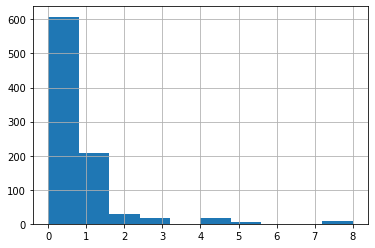

In [ ]:
# Solution
df['number_sibling_spouse'].hist()

Most of the passengers have 0 or 1 sibling/spouse. There are few cases where some have to 8 siblings/spouse.

**[1.8]** Display the rows with number_sibling_spouse = 8

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df[df['number_sibling_spouse'] == 8]

,Unnamed: 0,passenger_id,survived,male,female,age,number_sibling_spouse,number_parent_children,fare,embarked_southampton,embarked_cherbourg,embarked_queenstown,ticket_class
159,159,160,0,1,0,4.0,8,2,69.55,1,0,0,3.0
180,180,181,0,0,1,7.0,8,2,69.55,1,0,0,3.0
201,201,202,0,1,0,16.0,8,2,69.55,1,0,0,3.0
324,324,325,0,1,0,19.0,8,2,69.55,1,0,0,3.0
792,792,793,0,0,1,20.0,8,2,69.55,1,0,0,3.0
846,846,847,0,1,0,18.0,8,2,69.55,1,0,0,3.0
863,863,864,0,0,1,14.0,8,2,69.55,1,0,0,3.0


These cases seem to be related to the children of the same family. They have the same information in most of the columns. We can notice we are missing one child in the dataset. We will keep these cases as they seem to be genuine.

**[1.9]** Print the histogram of 'number_parent_children'

In [ ]:
# Placeholder for student's code

<Axes: >

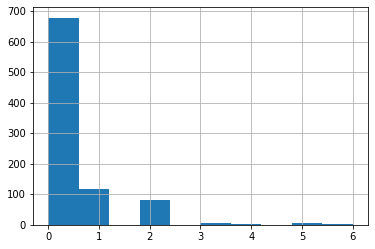

In [ ]:
# Solution
df['number_parent_children'].hist()

Few of the passengers have more than 4 parents/children onboard.

**[1.10]** Display the rows with number_parent_children >= 5

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df[df['number_parent_children'] >= 5]

,Unnamed: 0,passenger_id,survived,male,female,age,number_sibling_spouse,number_parent_children,fare,embarked_southampton,embarked_cherbourg,embarked_queenstown,ticket_class
13,13,14,0,1,0,39.0,1,5,31.2750,1,0,0,3.0
25,25,26,1,0,1,38.0,1,5,31.3875,1,0,0,3.0
610,610,611,0,0,1,39.0,1,5,31.2750,1,0,0,3.0
638,638,639,0,0,1,41.0,0,5,39.6875,1,0,0,3.0
678,678,679,0,0,1,43.0,1,6,46.9000,1,0,0,3.0
885,885,886,0,0,1,39.0,0,5,29.1250,0,0,1,3.0


They are few passengers with 5 or parents/children. It will require more work to cross-check these information with other features. For now we will keep these observations.

**[1.11]** Print the histogram of 'fare'

In [ ]:
# Placeholder for student's code

<Axes: >

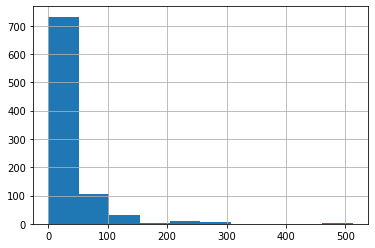

In [ ]:
# Solution
df['fare'].hist()

**[1.12]** Display the rows with fare > 400

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df[df['fare'] > 400]

,Unnamed: 0,passenger_id,survived,male,female,age,number_sibling_spouse,number_parent_children,fare,embarked_southampton,embarked_cherbourg,embarked_queenstown,ticket_class
258,258,259,1,0,1,38.0,0,0,512.3292,0,1,0,1.0
679,679,680,1,1,0,36.0,0,1,512.3292,0,1,0,1.0
737,737,738,1,1,0,35.0,0,0,512.3292,0,1,0,1.0


There are only 3 cases with fare of 512.33. They are all of class 1. So these may be genuine cases. We will keep them.

## 2. Data Preparation

**[2.1]** Create a copy of df and name it df_cleaned

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned = df.copy()

In [ ]:
# Unit Tests
assert isinstance(df_cleaned, pd.DataFrame)
assert df_cleaned.shape == df.shape

**[2.2]** Remove observations with missing values on ticket_class

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned.dropna(how='any', subset=['ticket_class'], inplace=True)

In [ ]:
# Unit Tests
assert df_cleaned['ticket_class'].isna().sum() == 0

**[2.3]** Print the dimensions of df_cleaned

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned.shape

(889, 13)

**[2.4]** Replace missing value on the age column with its mean

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
age_mean = df_cleaned['age'].mean()
df_cleaned['age'] = df_cleaned['age'].fillna(age_mean)

In [ ]:
# Unit Tests
assert df_cleaned['age'].isna().sum() == 0

**[2.5]** Print the number of duplicated rows


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned.duplicated().sum()

0

In [ ]:
# Unit Tests
assert df_cleaned.duplicated().sum() == 0

**[2.6]** Remove the Unnamed: 0 and passenger_id columns

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned.drop(['Unnamed: 0', 'passenger_id'], axis=1, inplace=True)

In [ ]:
# Unit Tests
assert df_cleaned.shape == (889, 11)

## 3. Data Splitting

**[3.1]** Split the data into feature **X** and target **y**:

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y = df_cleaned['survived']
X = df_cleaned.drop(['survived'], axis=1)

**[3.2]** Import train_test_split from sklearn.model_selection

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.model_selection import train_test_split

**[3.4]** Split the features and target variable into 2 different sets with 90-10 ratio

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
assert isinstance(X_data, pd.DataFrame)
assert X_data.shape == (800, 10)
assert isinstance(X_test, pd.DataFrame)
assert X_test.shape == (89, 10)
assert isinstance(y_data, pd.Series)
assert y_data.shape == (800, )
assert isinstance(y_test, pd.Series)
assert y_test.shape == (89, )

**[3.5]** Split the set with 90% of the data into a training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [ ]:
# Unit Tests
assert isinstance(X_train, pd.DataFrame)
assert X_train.shape == (640, 10)
assert isinstance(X_val, pd.DataFrame)
assert X_val.shape == (160, 10)
assert isinstance(y_train, pd.Series)
assert y_train.shape == (640, )
assert isinstance(y_val, pd.Series)
assert y_val.shape == (160, )

## 4. Assess Baseline Model

**[4.1]** Find the mode of the target variable and print its value

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_mode = y_train.mode()

**[4.2]** Import numpy package

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import numpy as np

**[4.3]** Create a numpy array called y_base filled with the mode

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_base = np.full(y_train.shape, y_mode)

In [ ]:
# Unit Tests
assert isinstance(y_base, np.ndarray)
assert y_base.shape == y_train.shape

**[4.4]** Import the accuracy score from sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.metrics import accuracy_score

**[4.5]** Display the accuracy score of this baseline model

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
accuracy_score(y_train, y_base)

0.6125

## 5. Train a Logistic Regression Model

**[5.1]** Import the LogisticRegression class from sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.linear_model import LogisticRegression

**[5.2]** Instantiate our model default hyperparameter

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
log_reg = LogisticRegression()

**[5.3]** Fit our model with the training data

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**[5.4]** Print the accuracy score of this model for the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_train_preds_log = log_reg.predict(X_train)
accuracy_score(y_train, y_train_preds_log)

0.803125

**[5.5]** Print the accuracy score of this model for the validation set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_val_preds_log = log_reg.predict(X_val)
accuracy_score(y_val, y_val_preds_log)

0.75625

## 6. Train Logistic Regression Classifier with L1 and L2 Regularisation

**[6.1]** Instantiate a Logistic Regression with L1 and L2 regularisation

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
log_elastic_reg = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

**[6.2]** Fit our model with the training data

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
log_elastic_reg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

**[6.3]** Display the accuracy score for the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_train_preds_elastic = log_elastic_reg.predict(X_train)
accuracy_score(y_train, y_train_preds_elastic)

0.6921875

**[6.4]** Display the accuracy score for the validation set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_val_preds_elastic = log_elastic_reg.predict(X_val)
accuracy_score(y_val, y_val_preds_elastic)

0.675

## 7. Build a KNN model using euclidian distance

**[7.1]** Import the KNeighborsClassifier class from sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.neighbors import KNeighborsClassifier

**[7.2]** Instantiate our model with n_neighbors=15 and metric:'euclidean'

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
knn_15_euc_class = KNeighborsClassifier(n_neighbors=15, metric='euclidean')

**[7.3]** Fit our model with the training data

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
knn_15_euc_class.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

**[7.4]** Display the accuracy score on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_train_preds_knn_15_euc = knn_15_euc_class.predict(X_train)
accuracy_score(y_train, y_train_preds_knn_15_euc)

0.753125

**[7.5]** Display the accuracy score on the validation set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_val_preds_knn_15_euc = knn_15_euc_class.predict(X_val)
accuracy_score(y_val, y_val_preds_knn_15_euc)

0.64375

## 8. Build a KNN model using euclidian distance and 55 neighbors

**[8.1]** Instantiate our model with n_neighbors=55 and metric:'euclidean' and fit on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
knn_55_euc_class = KNeighborsClassifier(n_neighbors=55, metric='euclidean')
knn_55_euc_class.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=55)

**[8.2]** Display the accuracy score on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_train_preds_knn_55_euc = knn_55_euc_class.predict(X_train)
accuracy_score(y_train, y_train_preds_knn_55_euc)

0.7

**[8.3]** Display the accuracy score on the validation set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_val_preds_knn_55_euc = knn_55_euc_class.predict(X_val)
accuracy_score(y_val, y_val_preds_knn_55_euc)

0.675

## 9. Assess the Best Model on the Testing Set

**[9.1]** Using the trained logistic regression model with regularisation, display the accuracy score on the validation set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_test_preds_elastic = log_elastic_reg.predict(X_test)
accuracy_score(y_test, y_test_preds_elastic)

0.6966292134831461